In [3]:
import cv2

In [4]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
img=cv2.imread('C:/Users/DELL/classifier/MODEL/test_image/download.jpg')

In [6]:
img.shape

(168, 300, 3)

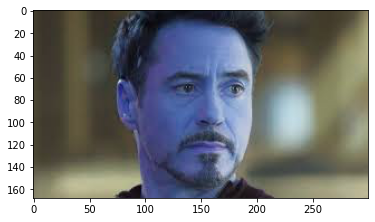

In [7]:
plt.imshow(img)

In [8]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [9]:
gray.shape

(168, 300)

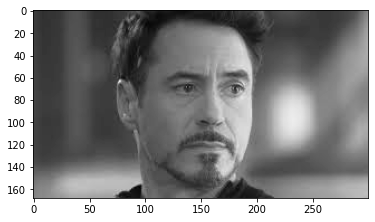

In [10]:
plt.imshow(gray,cmap='gray')

In [11]:
gray

array([[ 59,  58,  57, ..., 117, 121, 125],
       [ 59,  58,  57, ..., 117, 122, 126],
       [ 59,  58,  57, ..., 119, 123, 127],
       ...,
       [123, 124, 125, ..., 175, 175, 176],
       [124, 124, 125, ..., 172, 172, 173],
       [124, 124, 125, ..., 170, 171, 171]], dtype=uint8)

In [12]:
img

array([[[ 68,  63,  48],
        [ 67,  62,  47],
        [ 66,  61,  46],
        ...,
        [133, 126,  93],
        [139, 130,  97],
        [143, 134, 100]],

       [[ 68,  63,  48],
        [ 67,  62,  47],
        [ 66,  61,  46],
        ...,
        [133, 126,  93],
        [140, 131,  98],
        [144, 135, 101]],

       [[ 68,  63,  48],
        [ 67,  62,  47],
        [ 66,  61,  46],
        ...,
        [135, 128,  95],
        [141, 132,  98],
        [145, 136, 102]],

       ...,

       [[134, 130, 105],
        [135, 131, 106],
        [136, 132, 107],
        ...,
        [189, 184, 151],
        [189, 184, 151],
        [190, 185, 152]],

       [[135, 131, 106],
        [135, 131, 106],
        [136, 132, 107],
        ...,
        [186, 181, 148],
        [186, 181, 148],
        [187, 182, 149]],

       [[135, 131, 106],
        [135, 131, 106],
        [136, 132, 107],
        ...,
        [184, 179, 146],
        [185, 180, 147],
        [185, 180, 147]]

In [13]:
face_cascade=cv2.CascadeClassifier('C:/Users/DELL/classifier/MODEL/opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade=cv2.CascadeClassifier('C:/Users/DELL/classifier/MODEL/opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[ 98,  21, 120, 120]], dtype=int32)

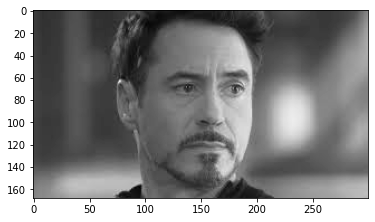

In [14]:
plt.imshow(gray,cmap='gray')

In [15]:
(x,y,w,h)=faces[0]

In [16]:
x,y,w,h

(98, 21, 120, 120)

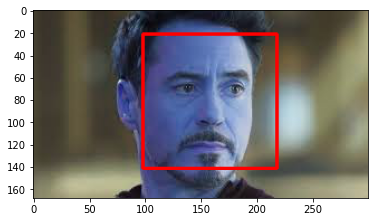

In [17]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

In [18]:
cv2.destroyAllWindows()

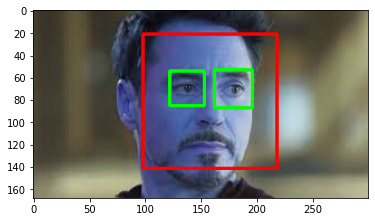

In [19]:
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

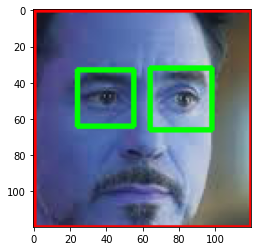

In [20]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [21]:
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    try:
        gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        faces=face_cascade.detectMultiScale(gray,1.3,5)
        try:
            for (x,y,w,h) in faces:
                roi_gray=gray[y:y+h,x:x+w]
                roi_color=img[y:y+h,x:x+w]
                eyes=eye_cascade.detectMultiScale(roi_gray)
                if len(eyes)==1:
                    return roi_color
                if len(eyes)>=2:
                    return roi_color
                else:
                    return
        except:
            return
    except:
        return

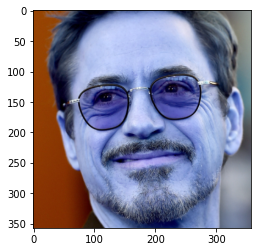

In [22]:
try:
    cropped_image=get_cropped_image_if_2_eyes('C:/Users/DELL/classifier/MODEL/test_image/rdj.jpg')
    plt.imshow(cropped_image)
except:
    pass

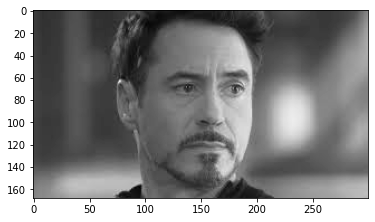

In [23]:
plt.imshow(gray,cmap='gray')

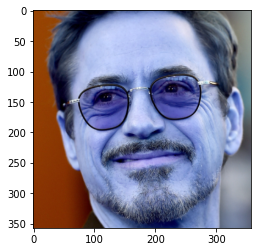

In [24]:
try:
    cropped_image=get_cropped_image_if_2_eyes('C:/Users/DELL/classifier/MODEL/test_image/rdj.jpg')
    plt.imshow(cropped_image)
except:
    pass

In [25]:
path_to_data = "C:/Users/DELL/classifier/MODEL/datasets/"
path_to_cr_data="C:/Users/DELL/classifier/MODEL/datasets/cropped/"

In [175]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
        

In [176]:
#img_dirs

['C:/Users/DELL/classifier/MODEL/datasets/chris_evans',
 'C:/Users/DELL/classifier/MODEL/datasets/chris_hemsworth',
 'C:/Users/DELL/classifier/MODEL/datasets/jerermy_renner',
 'C:/Users/DELL/classifier/MODEL/datasets/mark_ruffalo',
 'C:/Users/DELL/classifier/MODEL/datasets/rober_downey_jr',
 'C:/Users/DELL/classifier/MODEL/datasets/scarlett_johanson']

In [26]:
img_dirs=['C:/Users/DELL/classifier/MODEL/datasets/chris_evans',
 'C:/Users/DELL/classifier/MODEL/datasets/chris_hemsworth',
 'C:/Users/DELL/classifier/MODEL/datasets/jerermy_renner',
 'C:/Users/DELL/classifier/MODEL/datasets/mark_ruffalo',
 'C:/Users/DELL/classifier/MODEL/datasets/rober_downey_jr',
 'C:/Users/DELL/classifier/MODEL/datasets/scarlett_johanson']

import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

cropped_img_dir=[]
avengers_file_names_dict={}

for img_dirs in img_dirs:
    count=1
    avengers_name=img_dirs.split('/')[-1]
    print(avengers_name)
    
    avengers_file_names_dict[avengers_name]=[]
    
    for entry in os.scandir(img_dirs):
        roi_color=get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder=path_to_cr_data+avengers_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dir.append(cropped_folder)
                print("generating cropped images in folder",cropped_folder)
            cropped_file_name=avengers_name+str(count)+'.png'
            cropped_file_path=cropped_folder+'/'+cropped_file_name
            cv2.imwrite(cropped_file_path,roi_color)
            avengers_file_names_dict[avengers_name].append(cropped_file_path)
            count+=1


In [27]:
cropped_img = np.array(roi_color)
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY)
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

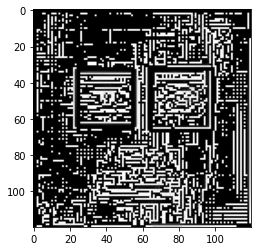

In [28]:
im_har = w2d(cropped_img,'db1',1)
plt.imshow(im_har, cmap='gray')

In [75]:
avengers_file_names_dict

{'chris_evans': ['C:/Users/DELL/classifier/MODEL/datasets/cropped\\chris_evans\\chris_evans1.png',
  'C:/Users/DELL/classifier/MODEL/datasets/cropped\\chris_evans\\chris_evans10.png',
  'C:/Users/DELL/classifier/MODEL/datasets/cropped\\chris_evans\\chris_evans11.png',
  'C:/Users/DELL/classifier/MODEL/datasets/cropped\\chris_evans\\chris_evans12.png',
  'C:/Users/DELL/classifier/MODEL/datasets/cropped\\chris_evans\\chris_evans13.png',
  'C:/Users/DELL/classifier/MODEL/datasets/cropped\\chris_evans\\chris_evans14.png',
  'C:/Users/DELL/classifier/MODEL/datasets/cropped\\chris_evans\\chris_evans15.png',
  'C:/Users/DELL/classifier/MODEL/datasets/cropped\\chris_evans\\chris_evans16.png',
  'C:/Users/DELL/classifier/MODEL/datasets/cropped\\chris_evans\\chris_evans18.png',
  'C:/Users/DELL/classifier/MODEL/datasets/cropped\\chris_evans\\chris_evans19.png',
  'C:/Users/DELL/classifier/MODEL/datasets/cropped\\chris_evans\\chris_evans2.png',
  'C:/Users/DELL/classifier/MODEL/datasets/cropped\\

In [43]:
import os

In [ ]:
for entry in os.scandir()

In [57]:
cropped_img_dirs="C:/Users/DELL/classifier/MODEL/datasets/cropped"

### nOT IMPORTANT ###
#cropped image directory list
crp_img_dir=[]
for entry in os.scandir(cropped_dir):
    crp_img_dir.append(entry.path)
crp_img_dir


### nOT IMPORTANT ###

In [69]:
#creating a dictionary of all  cropped images path to their respective avengers list 
avengers_file_names_dict={}
for img_dir in img_dirs:
    avengers_names=img_dir.split("/")[-1]
    file_list=[]
    print(img_dir)
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
        avengers_file_names_dict[avengers_names]=file_list
avengers_file_names_dict

C:/Users/DELL/classifier/MODEL/datasets/cropped
C:/Users/DELL/classifier/MODEL/datasets/cropped
C:/Users/DELL/classifier/MODEL/datasets/cropped\chris_evans
C:/Users/DELL/classifier/MODEL/datasets/cropped\chris_hemsworth
C:/Users/DELL/classifier/MODEL/datasets/cropped\jerermy_renner
C:/Users/DELL/classifier/MODEL/datasets/cropped\mark_ruffalo
C:/Users/DELL/classifier/MODEL/datasets/cropped\rober_downey_jr
C:/Users/DELL/classifier/MODEL/datasets/cropped\scarlett_johanson


{'chris_evans': ['C:/Users/DELL/classifier/MODEL/datasets/cropped\\chris_evans\\chris_evans1.png',
  'C:/Users/DELL/classifier/MODEL/datasets/cropped\\chris_evans\\chris_evans10.png',
  'C:/Users/DELL/classifier/MODEL/datasets/cropped\\chris_evans\\chris_evans11.png',
  'C:/Users/DELL/classifier/MODEL/datasets/cropped\\chris_evans\\chris_evans12.png',
  'C:/Users/DELL/classifier/MODEL/datasets/cropped\\chris_evans\\chris_evans13.png',
  'C:/Users/DELL/classifier/MODEL/datasets/cropped\\chris_evans\\chris_evans14.png',
  'C:/Users/DELL/classifier/MODEL/datasets/cropped\\chris_evans\\chris_evans15.png',
  'C:/Users/DELL/classifier/MODEL/datasets/cropped\\chris_evans\\chris_evans16.png',
  'C:/Users/DELL/classifier/MODEL/datasets/cropped\\chris_evans\\chris_evans18.png',
  'C:/Users/DELL/classifier/MODEL/datasets/cropped\\chris_evans\\chris_evans19.png',
  'C:/Users/DELL/classifier/MODEL/datasets/cropped\\chris_evans\\chris_evans2.png',
  'C:/Users/DELL/classifier/MODEL/datasets/cropped\\

In [71]:
img_dirs

['C:/Users/DELL/classifier/MODEL/datasets/chris_evans',
 'C:/Users/DELL/classifier/MODEL/datasets/chris_hemsworth',
 'C:/Users/DELL/classifier/MODEL/datasets/jerermy_renner',
 'C:/Users/DELL/classifier/MODEL/datasets/mark_ruffalo',
 'C:/Users/DELL/classifier/MODEL/datasets/rober_downey_jr',
 'C:/Users/DELL/classifier/MODEL/datasets/scarlett_johanson']

In [77]:
class_dict={}
count=0
for avengers_name in avengers_file_names_dict.keys():
    class_dict[avengers_name]=count
    count+=1
class_dict

{'chris_evans': 0,
 'chris_hemsworth': 1,
 'jerermy_renner': 2,
 'mark_ruffalo': 3,
 'rober_downey_jr': 4,
 'scarlett_johanson': 5}

In [78]:
x=[]
y=[]
for avengers_name,training_files in avengers_file_names_dict.items():
    for training_image in training_files:
        img=cv2.imread(training_image)
        scalled_raw_img=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scalled_img_har=cv2.resize(img_har,(32,32))
        combined_img=np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[avengers_name])

In [115]:
len(x)

516

In [116]:
x

array([[ 70.,  66.,  68., ...,   2.,   4.,  52.],
       [255., 255., 255., ..., 242., 225.,  31.],
       [ 37.,  26.,  28., ..., 251.,  25., 246.],
       ...,
       [ 25.,  37., 115., ..., 174.,  48., 236.],
       [164., 186., 249., ...,   5.,   4.,   0.],
       [194., 176., 147., ...,   7., 236.,   2.]])

In [117]:
len(y)

516

In [81]:
x=np.array(x).reshape(len(x),4096).astype(float)
x.shape

(516, 4096)

In [83]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=9b12ed3af7ea6d6d2013f7982d81dfa4a3e732d6bfbecf75236cac3c36e7065f
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [84]:
from sklearn.svm import SVC

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [88]:
pipe=Pipeline([('scaler',StandardScaler()),('scv',SVC(kernel='rbf',C=10))])
pipe.fit(x_train,y_train)
pipe.score(x_test,y_test)

0.6046511627906976

In [93]:
print(classification_report(y_test,pipe.predict(x_test)))

              precision    recall  f1-score   support

           0       0.45      0.53      0.49        17
           1       0.62      0.47      0.53        17
           2       0.71      0.54      0.61        28
           3       0.61      0.85      0.71        26
           4       0.75      0.21      0.33        14
           5       0.60      0.78      0.68        27

    accuracy                           0.60       129
   macro avg       0.62      0.56      0.56       129
weighted avg       0.63      0.60      0.59       129



In [94]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [95]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [97]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.638428,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.377423,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.687446,{'logisticregression__C': 5}


In [98]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, solver='liblinear'))])}

In [99]:
best_estimators['svm'].score(x_test,y_test)

0.7209302325581395

In [100]:
best_estimators['random_forest'].score(x_test,y_test)

0.32558139534883723

In [101]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.689922480620155

In [102]:
best_clf=best_estimators['svm']

In [104]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(x_test))
cm

array([[13,  4,  0,  0,  0,  0],
       [ 1, 12,  1,  1,  0,  2],
       [ 4,  1, 20,  1,  2,  0],
       [ 1,  1,  3, 21,  0,  0],
       [ 2,  1,  1,  4,  5,  1],
       [ 1,  1,  0,  3,  0, 22]], dtype=int64)

Text(69.0, 0.5, 'Truth')

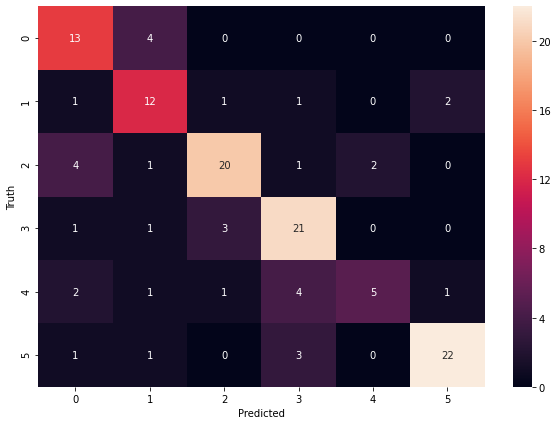

In [105]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [109]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [111]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [110]:
class_dict

{'chris_evans': 0,
 'chris_hemsworth': 1,
 'jerermy_renner': 2,
 'mark_ruffalo': 3,
 'rober_downey_jr': 4,
 'scarlett_johanson': 5}

In [113]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,


In [114]:
x

array([[ 70.,  66.,  68., ...,   2.,   4.,  52.],
       [255., 255., 255., ..., 242., 225.,  31.],
       [ 37.,  26.,  28., ..., 251.,  25., 246.],
       ...,
       [ 25.,  37., 115., ..., 174.,  48., 236.],
       [164., 186., 249., ...,   5.,   4.,   0.],
       [194., 176., 147., ...,   7., 236.,   2.]])